# **Sidewalk Detection**

In [2]:
# Download YOLOv7 code
#!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
from pathlib import Path

import torch

from models.yolo import Model
from utils.general import check_requirements, set_logging
from utils.google_utils import attempt_download
from utils.torch_utils import select_device

dependencies = ['torch', 'yaml']
#check_requirements(Path("C:/Users/Manya Gaur/Capstone/yolov7/requirements.txt").parent / 'requirements.txt', exclude=('pycocotools', 'thop'))
#set_logging()

def custom(path_or_model='path/to/model.pt', autoshape=True):
    """custom mode

    Arguments (3 options):
        path_or_model (str): 'path/to/model.pt'
        path_or_model (dict): torch.load('path/to/model.pt')
        path_or_model (nn.Module): torch.load('path/to/model.pt')['model']

    Returns:
        pytorch model
    """
    model = torch.load(path_or_model, map_location=torch.device('cpu')) if isinstance(path_or_model, str) else path_or_model  # load checkpoint
    if isinstance(model, dict):
        model = model['ema' if model.get('ema') else 'model']  # load model

    hub_model = Model(model.yaml).to(next(model.parameters()).device)  # create
    hub_model.load_state_dict(model.float().state_dict())  # load state_dict
    hub_model.names = model.names  # class names
    if autoshape:
        hub_model = hub_model.autoshape()  # for file/URI/PIL/cv2/np inputs and NMS
    device = select_device('0' if torch.cuda.is_available() else 'cpu')  # default to GPU if available
    return hub_model.to(device)

model = custom(path_or_model='C:/Users/Manya Gaur/Downloads/best (18).pt')  # custom example
# model = create(name='yolov7', pretrained=True, channels=3, classes=80, autoshape=True)  # pretrained example

# Verify inference
import numpy as np
from PIL import Image

#imgs = [np.zeros((640, 480, 3))]

results = model("C:/Users/Manya Gaur/Downloads/dsc01116_-_copy.jpg")  # batched inference
##results = model("C:/Users/Manya Gaur/Downloads/images (2).jpg")
#results = model("C:/Users/Manya Gaur/Downloads/infra-3.jpg")
##results = model("C:/Users/Manya Gaur/Downloads/Good footpath Road walking.jpeg")
#results = model("C:/Users/Manya Gaur/Downloads/781834-footpath-01.jpg")
#results.print()
#results.save()
df_prediction = results.pandas().xyxy
df_prediction

C:\Users\Manya Gaur\Capstone\yolov7
Adding autoShape... 


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[          xmin        ymin         xmax         ymax  confidence  class  \
 0   597.178162  111.693291   993.263367   185.010452    0.531593      1   
 1   590.070618   93.170227   978.338196   153.020966    0.522384      1   
 2   637.868652  172.181625   998.197876   262.984406    0.504354      1   
 3   399.069092  223.654510   668.467529   313.510437    0.495941      0   
 4   273.890686  372.554443   765.524231   543.153259    0.485201      0   
 5   678.074585  248.695740  1000.000000   358.746796    0.480166      1   
 6   647.894653  212.881699  1000.000000   303.734100    0.428708      1   
 7   441.318878  181.852798   639.375916   256.351227    0.413650      0   
 8   363.592651  266.561371   688.488953   379.927277    0.413211      0   
 9   325.999725  310.414581   719.024109   436.709869    0.386831      0   
 10  448.878723  162.088806   627.426025   223.319092    0.361049      0   
 11  468.267639  138.720261   612.371704   198.475876    0.341933      0   
 12  702.650

0.7501875468867217
19


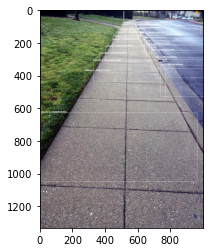

In [3]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import tkinter
%matplotlib inline

def plot_bounding_box(image, annotation_list):
    #annotations = np.array(annotation_list)
    w, h = image.size
    print(1000/h)
    plotted_image = ImageDraw.Draw(image)
    print(len(annotation_list))
    for i in range(len(annotation_list)):
        x0 = annotation_list.loc[i,"xmin"]
        y0 = annotation_list.loc[i,"ymin"]
        x1 = annotation_list.loc[i,"xmax"]
        y1 = annotation_list.loc[i,"ymax"]
        conf = annotation_list.loc[i,"confidence"]
        cls_no = annotation_list.loc[i,"class"]
        obj_cls = annotation_list.loc[i,"name"]
        
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), obj_cls+" "+str(conf))
    
    plt.imshow(np.array(image))
    plt.show()
    


#Get the corresponding image file
image_file = "C:/Users/Manya Gaur/Downloads/dsc01116_-_copy.jpg"
##image_file = "C:/Users/Manya Gaur/Downloads/images (2).jpg"
#image_file = "C:/Users/Manya Gaur/Downloads/infra-3.jpg"
##image_file = "C:/Users/Manya Gaur/Downloads/Good footpath Road walking.jpeg"
#image_file = "C:/Users/Manya Gaur/Downloads/781834-footpath-01.jpg"
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, df_prediction[0])